In [1]:
import pandas as pd
import os

##### merge 12 months of data into a single file

In [2]:
files = [file for file in os.listdir('./Sales/')]

combined = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales/"+file)
    combined = pd.concat([combined,df])
combined.head()

combined.to_csv("total_sales.csv",index=False)

##### load and clean the data for analysis

In [3]:
total_sale = pd.read_csv("total_sales.csv")

##### Check missing values

In [4]:
#identify any missing values in the dataset
total_sale[total_sale["Purchase Address"].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#values are missing from row, therefore, row should be removed
total_sale.dropna(axis=0,inplace=True)

In [6]:
total_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:
#To see if there are any more missing values
total_sale.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

##### Check duplicates

In [8]:
# check number of duplicates
total_sale.duplicated().sum()

#there are 618 duplicates.
#remove duplicates
total_sale.drop_duplicates(inplace=True)

In [9]:
#check if there is any duplicates agains
total_sale.duplicated().sum()

0

##### creating column for date(month,day,year) and address(1st line, city and postcode)

In [10]:
#Create a list of day, month and year column to extract needed information
total_sale["date_seperate"] = total_sale["Order Date"].str.split('/')

In [11]:
total_sale

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date_seperate
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001","[12, 30, 19 00:01]"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001","[12, 29, 19 07:03]"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001","[12, 12, 19 18:21]"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016","[12, 22, 19 15:13]"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301","[12, 18, 19 12:38]"
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215","[06, 07, 19 19:02]"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001","[06, 01, 19 19:29]"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016","[06, 22, 19 18:57]"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016","[06, 26, 19 18:35]"


In [12]:
# extract necessary date and put them in column
total_sale["Month"] = total_sale["date_seperate"].str[0]
total_sale["Day"] = total_sale["date_seperate"].str[1]
total_sale["Year"] = total_sale["date_seperate"].str[2]

In [13]:
total_sale.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date_seperate,Month,Day,Year
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001","[12, 30, 19 00:01]",12,30,19 00:01
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001","[12, 29, 19 07:03]",12,29,19 07:03
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001","[12, 12, 19 18:21]",12,12,19 18:21


In [14]:
#remove date_seperate
total_sale.drop("date_seperate",axis=1,inplace=True)

In [15]:
# check data now
total_sale.head(2)
# there is hour attached to year column. remove that.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,30,19 00:01
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,29,19 07:03


In [16]:
# Create a list of day, month and year column to extract needed information
total_sale["year_seperate"] = total_sale["Year"].str.split()

In [17]:
# create year out of year_seperate
total_sale.drop("Year",axis=1,inplace=True)
total_sale["Year"] = total_sale["year_seperate"].str[0]
total_sale.drop("year_seperate",axis=1,inplace=True)


###### Check the quality of the data after changes are implemented

In [18]:
total_sale[total_sale.isna().any(axis=1)]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date,NaN,NaN


In [19]:
#index number 254 have headings as their data. remove it
total_sale.dropna(inplace=True)
total_sale[total_sale.isna().any(axis=1)]
#NaN value removed

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year


In [20]:
total_sale.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,30,19
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,29,19


###### For address

In [21]:
#create list from address to extract information required for more columns
total_sale["address_seperate"] = total_sale["Purchase Address"].str.split(',')

In [22]:
total_sale.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,address_seperate
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,30,19,"[136 Church St, New York City, NY 10001]"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,29,19,"[562 2nd St, New York City, NY 10001]"


In [23]:
# Extract street, city and zip from "address_seperate"
total_sale["Street"] = total_sale["address_seperate"].str[0]
total_sale["City"] = total_sale["address_seperate"].str[1]
total_sale["Zip Code"] = total_sale["address_seperate"].str[2]

In [24]:
total_sale.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,address_seperate,Street,City,Zip Code
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,30,19,"[136 Church St, New York City, NY 10001]",136 Church St,New York City,NY 10001


In [25]:
total_sale["Zip_seperator"] = total_sale["Zip Code"].str.split(" ")


In [26]:
#create state and zip out of zip seperator
total_sale["State"] = total_sale["Zip_seperator"].str[1]
total_sale["Zip"] = total_sale["Zip_seperator"].str[2]

In [27]:
#Remove unnecessary columns
total_sale.drop(["address_seperate","Zip Code","Zip_seperator"],axis=1,inplace=True)

In [28]:
#convert 01,02 in month to 1, 2 respectively
total_sale['Month'] = total_sale['Month'].astype(str).str.lstrip('0').astype(int)

### What was the best month for sales? How much was earned that months?
- top sales month was december where the total sales was $4608295. Followed by 10, 04, 11 and 05

In [29]:
#Create a column for total sales
total_sale["Quantity Ordered"] = total_sale["Quantity Ordered"].astype(int)
total_sale["Price Each"] = total_sale["Price Each"].astype(float)

total_sale["Total sale"] = total_sale["Quantity Ordered"]*total_sale["Price Each"]


In [30]:
#define a variable which will hold groupby 
sale_by_month = total_sale.groupby("Month").sum().astype(int)
sale_by_month

,Quantity Ordered,Price Each,Total sale
Month,,,
1,10893,1810924,1821413
2,13431,2186940,2200078
3,16979,2789084,2804973
4,20536,3366218,3389217
5,18653,3133134,3150616
6,15234,2560503,2576280
7,16054,2631225,2646461
8,13429,2226963,2241083
9,13091,2081897,2094465


Text(0, 0.5, 'Sales in USD ($)')

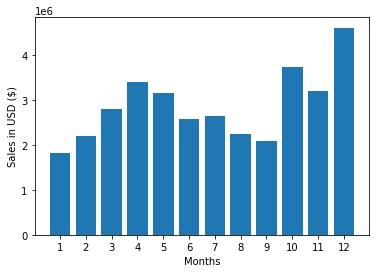

In [31]:
# visualise the data
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,sale_by_month["Total sale"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD ($)")



### What city had the highest number of sales?

- San francisco had highest sales

In [32]:
sale_by_city = total_sale.groupby('City').sum()["Total sale"].sort_values(ascending=False)
sale_by_city

City
 San Francisco    8254743.55
 Los Angeles      5448304.28
 New York City    4661867.14
 Boston           3658627.65
 Atlanta          2794199.07
 Dallas           2765373.96
 Seattle          2745046.02
 Portland         2319331.94
 Austin           1818044.33
Name: Total sale, dtype: float64

### what time should we display advertisement to maximize customer's buying product?

- 19 PM is the best time to advertise as the total amount of sales at time time is $2411971.14

In [33]:
total_sale["Time"] = total_sale["Order Date"].str.split(" ").str[1].str.split(":").str[0]

In [34]:
total_sale.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Street,City,State,Zip,Total sale,Time
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,30,19,136 Church St,New York City,NY,10001,1700.00,00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,29,19,562 2nd St,New York City,NY,10001,600.00,07
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,12,19,277 Main St,New York City,NY,10001,11.95,18


In [35]:
# to answer the question:
sale_by_time = total_sale.groupby(by="Time").sum()[["Total sale","Price Each"]].sort_values\
(by="Total sale",ascending=False)

sale_by_time.head()

,Total sale,Price Each
Time,,
19,2411971.14,2397620.91
12,2314359.85,2297415.19
11,2296619.84,2284864.78
20,2280784.36,2267253.28
18,2218374.01,2206722.64
